# **Objective:**
### To predict the percentage of a student if he/she studies for 9.25 hrs/day


In [ ]:
# importing libraries to mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import datetime
pd.set_option('float_format','{:50f}'.format)
pd.set_option('display.max_rows', 700000)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# **1. Reading and Understanding Data**

In [ ]:
# Reading the data
df_student = pd.read_csv('http://bit.ly/w-data')

In [ ]:
# Checking the data
df_student

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


### According to the objective target variable here is **Scores**.

In [ ]:
# Inspecting the data to check the datatypes of the columns
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Checking the statistical parameters of the data
df_student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **2. Visualizing the Data**

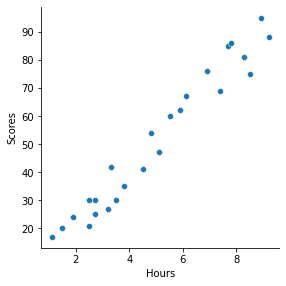

In [ ]:
sns.pairplot(df_student, x_vars='Hours', y_vars='Scores',size=4, aspect=1, kind='scatter')
plt.show()

### There seems linear relationship between the number of hours and scores.
### Therefore by the nature of the graph we see that a student scores are towards higher range when the number of hours increases.

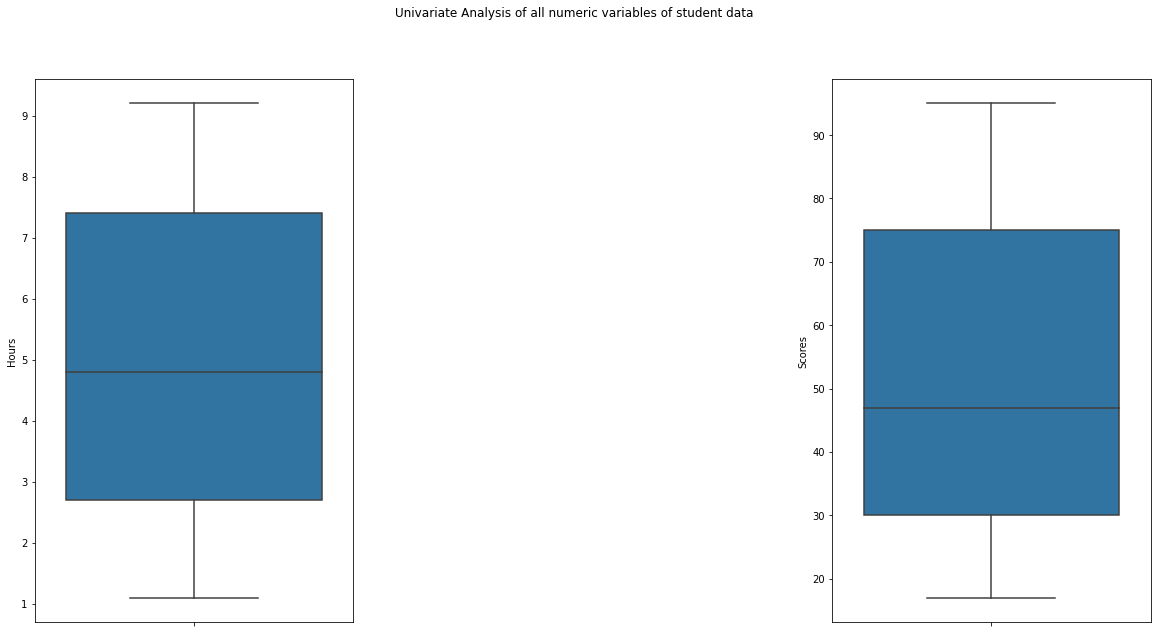

In [ ]:
# Checking outliers
# Plotting Box Plots
plt.figure(figsize =(20,10))
plt.suptitle("Univariate Analysis of all numeric variables of student data")
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=df_student['Hours'])

plt.subplot(1,2,2)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=df_student['Scores'])
plt.show()

In [ ]:
# There seems to be no outliers in both the columns of data.

# **3. Performing Simple Linear Regression**

In [ ]:
# Dividing into dependent(y) and independent(X) variables
X = df_student['Hours']
y = df_student['Scores']

In [ ]:
# Splitting into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Checking X_train
X_train.head()

6                                              9.200000
12                                             4.500000
4                                              3.500000
24                                             7.800000
0                                              2.500000
Name: Hours, dtype: float64

In [ ]:
# Checking y_train
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [ ]:
# Building a Linear Model
import statsmodels.api as sm

In [ ]:
# add constant to get intercept c
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                                             1.495142
Hours                                             9.871714
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.15e-11
Time:                        22:34:02   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

# We can see the R-squared value for this model is 0.957 which is a very good score.

## Therefore the equation of the best fit line is :
# **Scores = 1.5+9.87xHours**

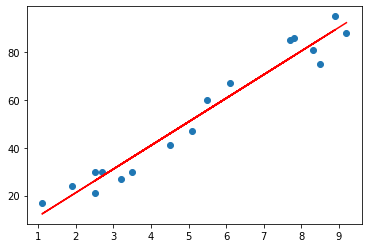

In [ ]:
# Checking the nature of the training data set
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.5 + 9.87*X_train, 'r')
plt.show()

# **4. Predictions on test set**

In [ ]:
# Checking the test set
X_test

9                                              2.700000
22                                             3.800000
13                                             3.300000
11                                             5.900000
5                                              1.500000
19                                             7.400000
23                                             6.900000
21                                             4.800000
Name: Hours, dtype: float64

In [ ]:
# Insert asked value in the test data
X_test.loc[8]=9.25  

In [ ]:
# Checking the test set
X_test

9                                              2.700000
22                                             3.800000
13                                             3.300000
11                                             5.900000
5                                              1.500000
19                                             7.400000
23                                             6.900000
21                                             4.800000
Name: Hours, dtype: float64

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
# Observing the predicted values
y_pred

9                                             28.148771
22                                            39.007657
13                                            34.071800
11                                            59.738257
5                                             16.302714
19                                            74.545829
23                                            69.609972
21                                            48.879371
8                                             92.808501
dtype: float64

## **We have got our answer in the last row of the above dataset that is if a student studies for 9.25 hrs/day he/she scores 92.81%**

In [ ]:
# libraries to find the r-squared score for test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Dropping the asked value to make the predicted data set of same shape as that of test data set
y_pred.drop(8, inplace=True)

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160845

In [ ]:
# Finding out the value of Model evaluation metric i.e Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332275


In [ ]:
# Finding out the r-squared score for the test data compared to the predicted data to evaluate the model
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

# It seems to be a very good model for prediction because both the training and testing data have top scores.

In [ ]:
# Checking X_test data
X_test

9                                              2.700000
22                                             3.800000
13                                             3.300000
11                                             5.900000
5                                              1.500000
19                                             7.400000
23                                             6.900000
21                                             4.800000
8                                              9.250000
Name: Hours, dtype: float64

In [ ]:
# Checking y_test data
y_test

9     25
22    35
13    42
11    62
5     20
19    69
23    76
21    54
Name: Scores, dtype: int64

In [ ]:
# Dropping the asked data to equalise the shape with the y_test data
X_test.drop(8,inplace=True)

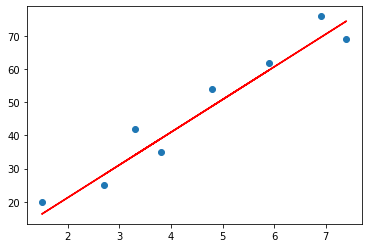

In [ ]:
# Observing the nature of the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.5 + 9.87*X_test, 'r')
plt.show()

In [ ]:
# The nature of the test data also seems to be linearly increasing.

# **Data Analysis Conclusion:**
# 1. The more number of hours a student studies the better he or she scores.
# 2. Any student who will study for 9.25 hrs/day will get 92.81%